In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df=pd.read_csv('cleansing folder/spend_main_analysis.csv')
df.head()

,TransactionID,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
0,TXN001,Desk Chair,Furniture,10,113.15,1131.50,2024-04-19,TechMart Inc.,Kelly Joseph
1,TXN002,Stapler,Office Supplies,16,12.62,201.92,2024-07-06,CloudSoft Corp.,Kelly Joseph
2,TXN003,Annual Software License,Software,1,5649.34,5649.34,2024-09-10,TechMart Inc.,Kelly Joseph
3,TXN004,Notepad,Stationery,13,2.92,37.96,2024-01-21,FurniWorks Ltd.,Luis Holland
4,TXN005,Notepad,Stationery,19,1.39,26.41,2024-02-03,TechMart Inc.,Cynthia Jenkins


In [122]:
def cost_opt(data,x):
    df=data[data['ItemName']==x].reset_index(drop=True)
    #looking average price
    dfs=df['UnitPrice'].mean()
    

    grouped=df.groupby('Supplier')['UnitPrice'].mean().reset_index()
    grouped=grouped[grouped['UnitPrice']<=dfs].reset_index(drop=True)
    grouped=grouped.sort_values(by='UnitPrice')
    supplier=grouped.iloc[0]['Supplier']
    

    price=df.loc[df['Supplier']==supplier,'UnitPrice'].values[0]
    total_quantity = df['Quantity'].sum()
    opt=price*total_quantity
    total_price=df['TotalCost'].sum()
    saving=total_price-opt

    data={
        'ItemName':[x],
        'Supplier':[supplier],
        'OptPrice':[opt],
        'UnitPrice':[total_price],
        'Saving':[saving]
    }

    opt_price=pd.DataFrame(data)
    return opt_price

def gr_supplier(a,x):
    title=x
    df=a.groupby('Supplier')['UnitPrice'].sum().reset_index()
    df=df.sort_values(by='UnitPrice',ascending=False)

    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    palette = sns.color_palette("viridis", len(df))  

    ax = sns.barplot(data=df, x='Supplier', y='UnitPrice', palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8, padding=2)
    plt.xlabel('Supplier',fontweight='bold')
    plt.ylabel('UnitPrice',fontweight='bold')
    plt.title(title,fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()



In [123]:
result=[]
item_list = df['ItemName'].unique().tolist()

for item in item_list:
    a=cost_opt(df,item)
    result.append(a)

cost_opt=pd.concat(result,ignore_index=True)
cost_opt=cost_opt.reset_index(drop=True)


In [124]:
cost_opt.to_csv('OptimizationPrice.csv',index=False)

In [125]:
optprice=cost_opt['OptPrice'].sum()
costbefore=cost_opt['UnitPrice'].sum()
saving=cost_opt['Saving'].sum()
data={
    'OptPrice_sum':[optprice],
    'CostBefore_sum':[costbefore],
    'Saving_sum':[saving]
}
summary=pd.DataFrame(data)
summary

,OptPrice_sum,CostBefore_sum,Saving_sum
0,1069038.19,1240580.53,171542.34


C:\Users\HP\AppData\Local\Temp\ipykernel_8908\241898337.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_8908\241898337.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


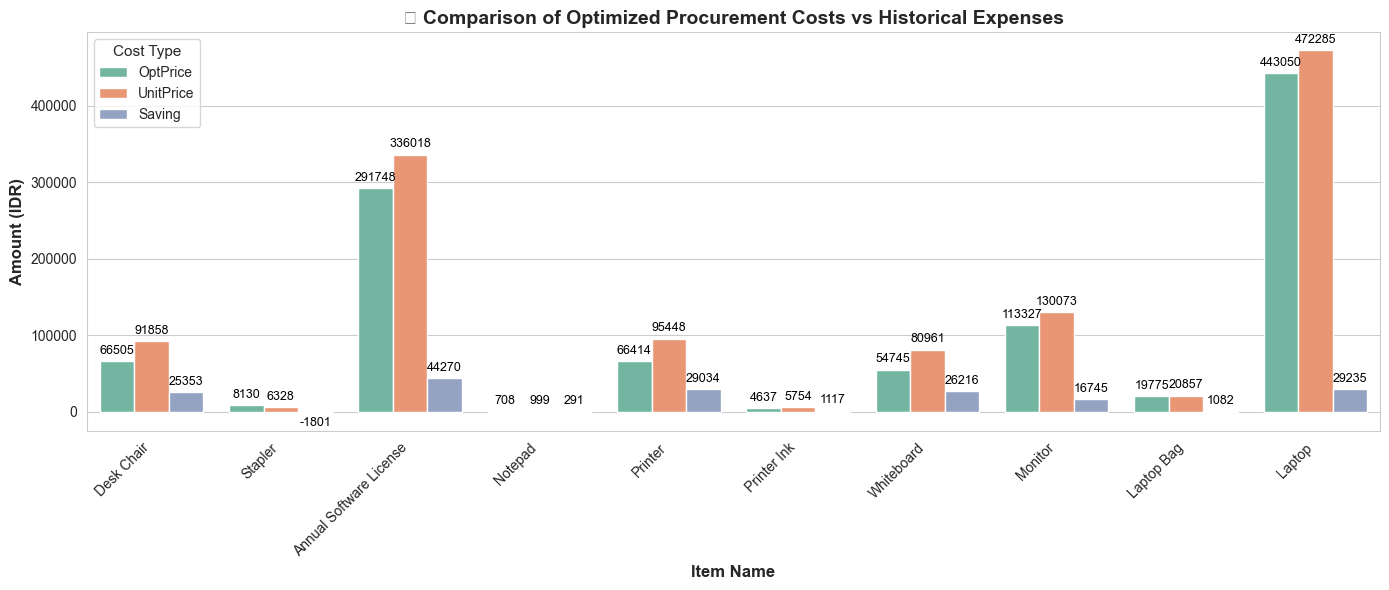

In [131]:
melted_cost_opt = pd.melt(
    cost_opt,
    id_vars='ItemName',
    value_vars=['OptPrice', 'UnitPrice', 'Saving'],
    var_name='CostType',
    value_name='Amount'
)


plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')

palette = sns.color_palette("Set2")

ax = sns.barplot(
    data=melted_cost_opt,
    x='ItemName',
    y='Amount',
    hue='CostType',
    palette=palette
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3, color='black')

plt.xlabel('Item Name', fontweight='bold', fontsize=12)
plt.ylabel('Amount (IDR)', fontweight='bold', fontsize=12)
plt.title('📊 Comparison of Optimized Procurement Costs vs Historical Expenses', fontweight='bold', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.legend(title='Cost Type', title_fontsize=11, fontsize=10, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\2971673020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=melted_summary, x='Category', y='TotalAmount', palette='Set2')


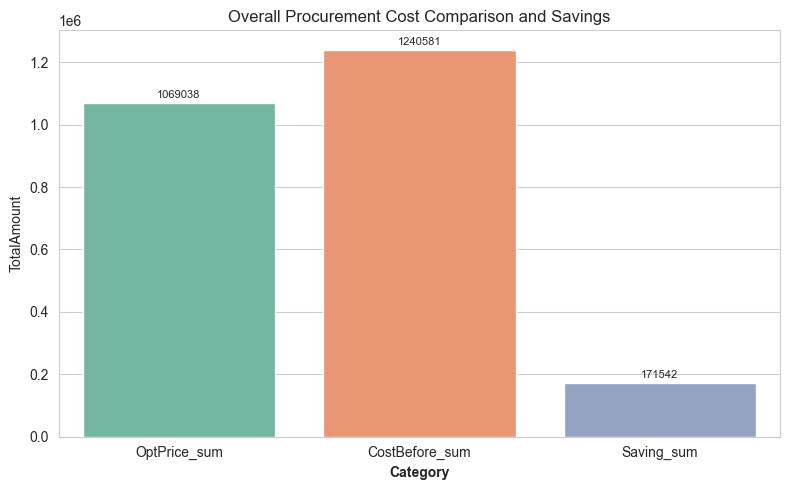

In [132]:
melted_summary = pd.melt(
    summary,
    var_name='Category',
    value_name='TotalAmount'
)

sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
ax=sns.barplot(data=melted_summary, x='Category', y='TotalAmount', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8, padding=2)
plt.xlabel('Category', fontweight='bold')
plt.title('Overall Procurement Cost Comparison and Savings')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\1312801618.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Supplier', y='UnitPrice', palette=palette)


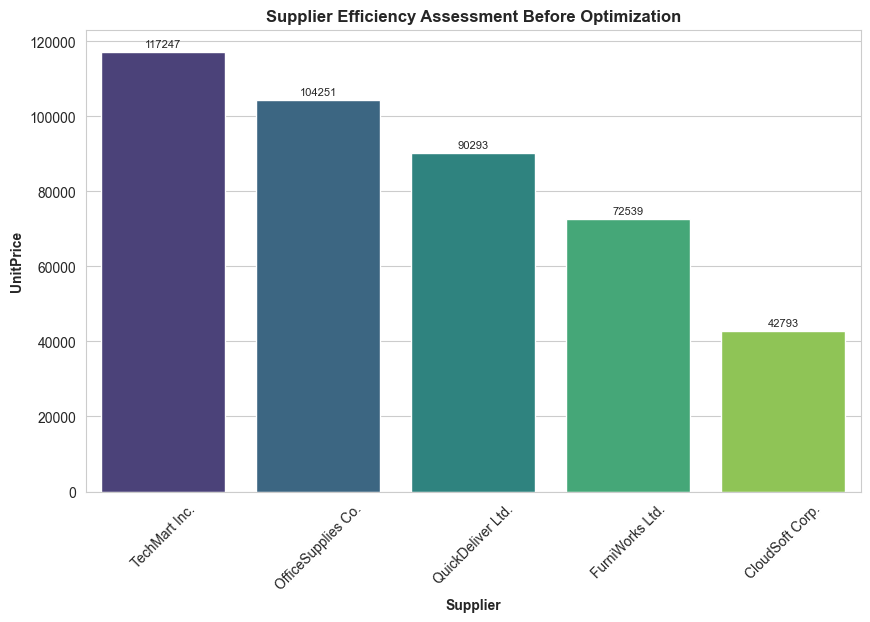

In [133]:
title='Supplier Efficiency Assessment Before Optimization'
df_vis=gr_supplier(df,title)
df_vis

C:\Users\HP\AppData\Local\Temp\ipykernel_8908\1312801618.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Supplier', y='UnitPrice', palette=palette)


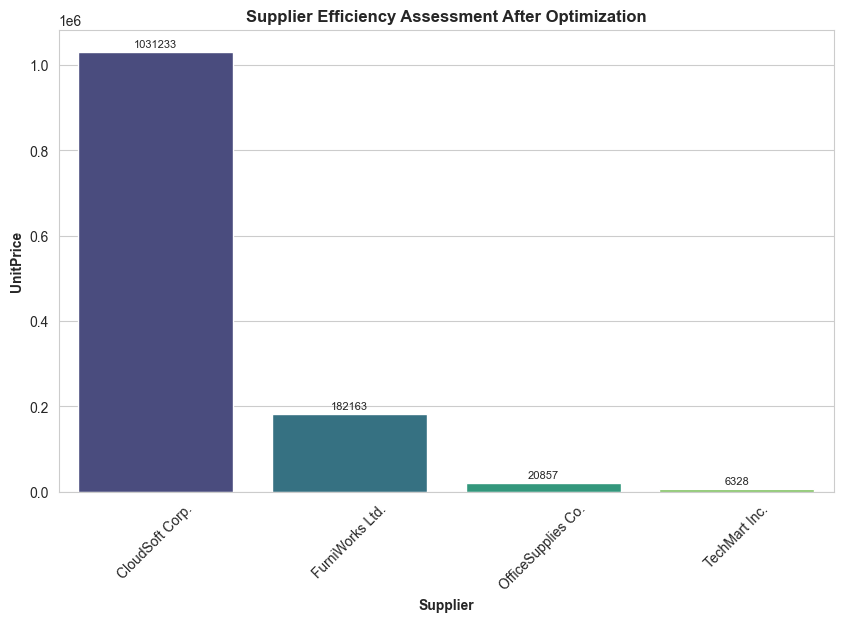

In [134]:
title='Supplier Efficiency Assessment After Optimization'
opt_vis=gr_supplier(cost_opt,title)
opt_vis